<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/MVGCN_2025_09_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
   creating: DATA_PICTURE_3D_Change/
   creating: DATA_PICTURE_3D_Change/picture_alpha/
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_vo

In [20]:
import os, glob

# مسیر دیتای تو
DATA_DIR = "/content/DATA_PICTURE_3D_Change"

# ساخت دیکشنری فایل‌ها و لیبل‌ها
labels = {}
for folder in ["picture_health", "picture_void", "picture_void_alpha"]:
    path = os.path.join(DATA_DIR, folder, "*.csv")
    for f in glob.glob(path):
        fname = os.path.join(folder, os.path.basename(f))
        if folder == "picture_health":
            labels[fname] = 0   # سالم
        else:
            labels[fname] = 1   # معیوب

print("Total files:", len(labels))
print("Sample:", list(labels.items())[:5])


Total files: 1188
Sample: [('picture_health/h_0.037_void_0.2.csv', 0), ('picture_health/h_0.031_void_0.1.csv', 0), ('picture_health/h_0.034_void_0.3.csv', 0), ('picture_health/h_0.027_void_0.1.csv', 0), ('picture_health/h_0.04_void_0.2.csv', 0)]


In [19]:
labels

{'picture_health/h_0.037_void_0.2.csv': 0,
 'picture_health/h_0.031_void_0.1.csv': 0,
 'picture_health/h_0.034_void_0.3.csv': 0,
 'picture_health/h_0.027_void_0.1.csv': 0,
 'picture_health/h_0.04_void_0.2.csv': 0,
 'picture_health/h_0.068_void_0.1.csv': 0,
 'picture_health/h_0.049_void_0.3.csv': 0,
 'picture_health/h_0.015_void_0.4.csv': 0,
 'picture_health/h_0.08_void_0.2.csv': 0,
 'picture_health/h_0.093_void_0.2.csv': 0,
 'picture_health/h_0.01_void_0.1.csv': 0,
 'picture_health/h_0.073_void_0.3.csv': 0,
 'picture_health/h_0.046_void_0.3.csv': 0,
 'picture_health/h_0.084_void_0.3.csv': 0,
 'picture_health/h_0.005_void_0.1.csv': 0,
 'picture_health/h_0.061_void_0.1.csv': 0,
 'picture_health/h_0.077_void_0.2.csv': 0,
 'picture_health/h_0.078_void_0.1.csv': 0,
 'picture_health/h_0.076_void_0.3.csv': 0,
 'picture_health/h_0.039_void_0.4.csv': 0,
 'picture_health/h_0.086_void_0.2.csv': 0,
 'picture_health/h_0.048_void_0.4.csv': 0,
 'picture_health/h_0.076_void_0.1.csv': 0,
 'picture_heal

In [21]:
# !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.8.0+cu126.html


In [22]:
labels

{'picture_health/h_0.037_void_0.2.csv': 0,
 'picture_health/h_0.031_void_0.1.csv': 0,
 'picture_health/h_0.034_void_0.3.csv': 0,
 'picture_health/h_0.027_void_0.1.csv': 0,
 'picture_health/h_0.04_void_0.2.csv': 0,
 'picture_health/h_0.068_void_0.1.csv': 0,
 'picture_health/h_0.049_void_0.3.csv': 0,
 'picture_health/h_0.015_void_0.4.csv': 0,
 'picture_health/h_0.08_void_0.2.csv': 0,
 'picture_health/h_0.093_void_0.2.csv': 0,
 'picture_health/h_0.01_void_0.1.csv': 0,
 'picture_health/h_0.073_void_0.3.csv': 0,
 'picture_health/h_0.046_void_0.3.csv': 0,
 'picture_health/h_0.084_void_0.3.csv': 0,
 'picture_health/h_0.005_void_0.1.csv': 0,
 'picture_health/h_0.061_void_0.1.csv': 0,
 'picture_health/h_0.077_void_0.2.csv': 0,
 'picture_health/h_0.078_void_0.1.csv': 0,
 'picture_health/h_0.076_void_0.3.csv': 0,
 'picture_health/h_0.039_void_0.4.csv': 0,
 'picture_health/h_0.086_void_0.2.csv': 0,
 'picture_health/h_0.048_void_0.4.csv': 0,
 'picture_health/h_0.076_void_0.1.csv': 0,
 'picture_heal

In [23]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.1.0+cu118.html


In [24]:
import torch, torch_geometric
print(torch.__version__)
print(torch.version.cuda)
print(torch_geometric.__version__)


2.8.0+cu126
12.6
2.6.1


In [50]:
import matplotlib.pyplot as plt

In [25]:
import os, numpy as np, pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import torch, torch.nn as nn, torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from torch_geometric.utils import to_undirected
try:
    from torch_scatter import scatter_add
    scatter_available = True
except:
    scatter_available = False

# ----------------- تنظیمات -----------------
K_NEIGHBORS = 8
THRESH_QUANTILE = 0.80
BATCH_SIZE = 8
EPOCHS = 50
LR = 1e-3
HIDDEN = 64
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ----------------- توابع کمکی -----------------
def compute_sigma_and_normals(points, k=8):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(points)
    distances, indices = nbrs.kneighbors(points)
    N = points.shape[0]
    sigmas, normals = np.zeros(N), np.zeros((N,3))
    for i, neigh_idx in enumerate(indices):
        neigh_pts = points[neigh_idx]
        centroid = neigh_pts.mean(axis=0)
        cov = np.cov((neigh_pts-centroid).T)
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = np.argsort(eigvals)
        eigvals, eigvecs = eigvals[order], eigvecs[:,order]
        lam0,lam1,lam2 = eigvals
        sigmas[i] = lam0 / (lam0+lam1+lam2+1e-12)
        normals[i] = eigvecs[:,0]
    return sigmas, normals, distances, indices

def build_pyg_data(fpath, k=8, q=0.8):
    df = pd.read_csv(fpath)
    points = df[['x','y','z']].values.astype(np.float32)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points,k)
    mean_dists = np.mean(distances[:,1:],axis=1)
    local_density = 1.0/(mean_dists+1e-12)
    delta = np.quantile(sigmas,q)
    mask = (sigmas>=delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)],axis=1).astype(np.float32)
    edges=[]
    for i in range(points.shape[0]):
        for j in indices[i][1:]:
            edges.append([i,j])
    edge_index=torch.tensor(edges,dtype=torch.long).t().contiguous()
    edge_index=to_undirected(edge_index)
    return Data(x=torch.tensor(feats),edge_index=edge_index,mask=torch.tensor(mask))

# ----------------- مدل MVGCN -----------------
class MVGCN(nn.Module):
    def __init__(self,in_channels,hidden,num_classes=2):
        super().__init__()
        self.conv1_local=GCNConv(in_channels,hidden)
        self.conv2_local=GCNConv(hidden,hidden)
        self.conv1_global=GCNConv(in_channels,hidden)
        self.conv2_global=GCNConv(hidden,hidden)
        self.fc1=nn.Linear(2*hidden,hidden)
        self.fc2=nn.Linear(hidden,num_classes)

    def masked_mean(self,x,mask,batch):
        maskf=mask.view(-1,1).float()
        xm=x*maskf
        if scatter_available:
            sum_mask=scatter_add(xm,batch,dim=0)
            counts=scatter_add(maskf,batch,dim=0)
            return sum_mask/(counts+1e-12)
        else:
            out=torch.zeros(batch.max()+1,x.size(1),device=x.device)
            cnt=torch.zeros(batch.max()+1,1,device=x.device)
            for i in range(x.size(0)):
                b=batch[i].item()
                if mask[i]==1:
                    out[b]+=x[i]; cnt[b]+=1
            return out/(cnt+1e-12)

    def forward(self,data):
        x,ei,b,mask=data.x,data.edge_index,data.batch,data.mask
        # local
        h_l=F.relu(self.conv1_local(x,ei))
        h_l=F.relu(self.conv2_local(h_l,ei))
        local_p=self.masked_mean(h_l,mask,b)
        # global
        inv_mask=(1-mask).long()
        h_g=F.relu(self.conv1_global(x,ei))
        h_g=F.relu(self.conv2_global(h_g,ei))
        global_p=self.masked_mean(h_g,inv_mask,b)
        # fuse
        fused=torch.cat([local_p,global_p],dim=1)
        out=F.relu(self.fc1(fused))
        return self.fc2(out)

# ----------------- آموزش و تست -----------------
def train_epoch(model,loader,opt,device):
    model.train(); total=0; preds=[]; labels=[]
    for d in loader:
        d=d.to(device); opt.zero_grad()
        out=model(d)
        loss=F.cross_entropy(out,d.y)
        loss.backward(); opt.step()
        total+=loss.item()
        preds.extend(out.argmax(1).cpu().numpy())
        labels.extend(d.y.cpu().numpy())
    return total/len(loader), accuracy_score(labels,preds)

@torch.no_grad()
def eval_epoch(model,loader,device):
    model.eval(); preds=[]; labels=[]
    for d in loader:
        d=d.to(device)
        out=model(d)
        preds.extend(out.argmax(1).cpu().numpy())
        labels.extend(d.y.cpu().numpy())
    return accuracy_score(labels,preds), classification_report(labels,preds,digits=4)

# ----------------- ساخت دیتاست -----------------
from torch_geometric.data import InMemoryDataset

class MyDataset(InMemoryDataset):
    def __init__(self,file_label_pairs,k=8,q=0.8):
        super().__init__('.')
        self.data_list=[]
        for f,lbl in file_label_pairs:
            d=build_pyg_data(f,k,q)
            d.y=torch.tensor([lbl])
            self.data_list.append(d)
    def get(self,idx): return self.data_list[idx]
    def len(self): return len(self.data_list)

# ----------------- ران کامل -----------------
file_label_pairs=[(os.path.join(DATA_DIR,k),v) for k,v in labels.items()]
dataset=MyDataset(file_label_pairs,K_NEIGHBORS,THRESH_QUANTILE)

idx=np.arange(len(dataset))
tr,te=train_test_split(idx,test_size=0.2,random_state=RANDOM_SEED,
                       stratify=[l for _,l in file_label_pairs])
train_list=[dataset.get(i) for i in tr]
test_list=[dataset.get(i) for i in te]
train_loader=DataLoader(train_list,batch_size=BATCH_SIZE,shuffle=True)
test_loader=DataLoader(test_list,batch_size=BATCH_SIZE)

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=MVGCN(8,HIDDEN,2).to(device)
opt=torch.optim.Adam(model.parameters(),lr=LR)

for epoch in range(1,EPOCHS+1):
    loss,acc=train_epoch(model,train_loader,opt,device)
    print(f"Epoch {epoch:03d} | Loss {loss:.4f} | Train Acc {acc:.4f}")

acc,report=eval_epoch(model,test_loader,device)
print("\n=== Test Result ===")
print("Accuracy:",acc)
print(report)


/usr/local/lib/python3.12/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 001 | Loss 0.8272 | Train Acc 0.6084
Epoch 002 | Loss 0.6825 | Train Acc 0.6021
Epoch 003 | Loss 0.6657 | Train Acc 0.6474
Epoch 004 | Loss 0.6589 | Train Acc 0.6421
Epoch 005 | Loss 0.6494 | Train Acc 0.6495
Epoch 006 | Loss 0.6482 | Train Acc 0.6663
Epoch 007 | Loss 0.6484 | Train Acc 0.6558
Epoch 008 | Loss 0.6453 | Train Acc 0.6663
Epoch 009 | Loss 0.6431 | Train Acc 0.6663
Epoch 010 | Loss 0.6380 | Train Acc 0.6663
Epoch 011 | Loss 0.6407 | Train Acc 0.6663
Epoch 012 | Loss 0.6394 | Train Acc 0.6663
Epoch 013 | Loss 0.6401 | Train Acc 0.6663
Epoch 014 | Loss 0.6385 | Train Acc 0.6663
Epoch 015 | Loss 0.6366 | Train Acc 0.6663
Epoch 016 | Loss 0.6387 | Train Acc 0.6663
Epoch 017 | Loss 0.6378 | Train Acc 0.6663
Epoch 018 | Loss 0.6389 | Train Acc 0.6663
Epoch 019 | Loss 0.6409 | Train Acc 0.6663
Epoch 020 | Loss 0.6427 | Train Acc 0.6663
Epoch 021 | Loss 0.6400 | Train Acc 0.6663
Epoch 022 | Loss 0.6401 | Train Acc 0.6663
Epoch 023 | Loss 0.6377 | Train Acc 0.6663
Epoch 024 |

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
total_result = []
folder_health = '/content/DATA_PICTURE_3D_Change/picture_health'
for file in os.listdir(folder_health):
  path = f'{folder_health}/{file}'
  new_file = path  # جایگزین با مسیر واقعی

  # ساخت داده PyG برای نمونه جدید
  new_data = build_pyg_data(new_file, k=K_NEIGHBORS, q=THRESH_QUANTILE)
  new_data.y = torch.tensor([0])  # یک مقدار dummy برای y، فقط برای سازگاری

  # اضافه کردن batch dimension
  new_data.batch = torch.zeros(new_data.x.size(0), dtype=torch.long)

  # انتقال به device
  new_data = new_data.to(device)
  model.eval()
  with torch.no_grad():
      out = model(new_data)
      pred_class = out.argmax(dim=1).cpu().numpy()
      print("Prediction for new sample:", pred_class)
      total_result.append(pred_class)


Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Prediction for new sample: [1]
Predicti

In [15]:
# مسیر فایل نمونه جدید
new_file = "/content/DATA_PICTURE_3D_Change/picture_health/h_0.009_void_0.4.csv"  # جایگزین با مسیر واقعی

# ساخت داده PyG برای نمونه جدید
new_data = build_pyg_data(new_file, k=K_NEIGHBORS, q=THRESH_QUANTILE)
new_data.y = torch.tensor([0])  # یک مقدار dummy برای y، فقط برای سازگاری

# اضافه کردن batch dimension
new_data.batch = torch.zeros(new_data.x.size(0), dtype=torch.long)

# انتقال به device
new_data = new_data.to(device)
model.eval()
with torch.no_grad():
    out = model(new_data)
    pred_class = out.argmax(dim=1).cpu().numpy()
    print("Prediction for new sample:", pred_class)


Prediction for new sample: [1]


In [13]:
@torch.no_grad()
def predict_single(csv_path, model, device, label_map={0:"health", 1:"defect"}):
    model.eval()
    # ساخت گراف از فایل CSV
    data = build_pyg_data(csv_path, k=K_NEIGHBORS, q=THRESH_QUANTILE)
    print(data)
    # data.y = torch.tensor([0])  # placeholder, استفاده نمیشه
    # data = data.to(device)
    # # پیش‌بینی
    # out = model(data)
    # pred = out.argmax(dim=1).item()
    # prob = F.softmax(out, dim=1).cpu().numpy()[0]
    # return pred, prob, label_map.get(pred, str(pred))

# مثال استفاده:
csv_path = "/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.012_void_0.1.csv"
pred, prob, label_name = predict_single(csv_path, model, device)
print(f"Predicted class: {label_name}")
print("Probabilities:", prob)


Data(x=[48, 8], edge_index=[2, 420], mask=[48])


TypeError: cannot unpack non-iterable NoneType object

In [31]:
import os, glob, numpy as np, pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import torch, torch.nn as nn, torch.nn.functional as F
from torch_geometric.data import Data, DataLoader, InMemoryDataset
from torch_geometric.nn import GCNConv
from torch_geometric.utils import to_undirected

try:
    from torch_scatter import scatter_add
    scatter_available = True
except:
    scatter_available = False

# ----------------- تنظیمات -----------------
DATA_DIR = "/content/DATA_PICTURE_3D_Change"
K_NEIGHBORS = 8
THRESH_QUANTILE = 0.8
BATCH_SIZE = 4
EPOCHS = 100
LR = 1e-3
HIDDEN = 64
DROPOUT = 0.3
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ----------------- آماده سازی فایل‌ها و لیبل‌ها -----------------
file_label_pairs = []
for folder in ["picture_health", "picture_void", "picture_alpha", "picture_void_alpha"]:
    path = os.path.join(DATA_DIR, folder, "*.csv")
    for f in glob.glob(path):
        lbl = 0 if folder == "picture_health" else 1
        file_label_pairs.append((f, lbl))

print("Total files:", len(file_label_pairs))
print("Sample:", file_label_pairs[:5])

# ----------------- توابع کمکی -----------------
def compute_sigma_and_normals(points, k=8):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(points)
    distances, indices = nbrs.kneighbors(points)
    N = points.shape[0]
    sigmas, normals = np.zeros(N), np.zeros((N,3))
    for i, neigh_idx in enumerate(indices):
        neigh_pts = points[neigh_idx]
        centroid = neigh_pts.mean(axis=0)
        cov = np.cov((neigh_pts-centroid).T)
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = np.argsort(eigvals)
        eigvals, eigvecs = eigvals[order], eigvecs[:,order]
        lam0,lam1,lam2 = eigvals
        sigmas[i] = lam0 / (lam0+lam1+lam2+1e-12)
        normals[i] = eigvecs[:,0]
    return sigmas, normals, distances, indices

def build_pyg_data(fpath, k=8, q=0.8, scaler=None):
    df = pd.read_csv(fpath)
    points = df[['x','y','z']].values.astype(np.float32)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points,k)
    mean_dists = np.mean(distances[:,1:],axis=1)
    local_density = 1.0/(mean_dists+1e-12)
    delta = np.quantile(sigmas,q)
    mask = (sigmas>=delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)],axis=1).astype(np.float32)
    if scaler is not None:
        feats = scaler.transform(feats)
    edges=[]
    for i in range(points.shape[0]):
        for j in indices[i][1:]:
            edges.append([i,j])
    edge_index=torch.tensor(edges,dtype=torch.long).t().contiguous()
    edge_index=to_undirected(edge_index)
    return Data(x=torch.tensor(feats,dtype=torch.float), edge_index=edge_index, mask=torch.tensor(mask,dtype=torch.long))

# ----------------- دیتاست PyG -----------------
class MyDataset(InMemoryDataset):
    def __init__(self,file_label_pairs,k=8,q=0.8,scaler=None):
        super().__init__('.')
        self.data_list=[]
        for f,lbl in file_label_pairs:
            d=build_pyg_data(f,k,q,scaler)
            d.y = torch.tensor([lbl])
            self.data_list.append(d)
    def get(self,idx): return self.data_list[idx]
    def len(self): return len(self.data_list)

# ----------------- استانداردسازی ویژگی‌ها -----------------
all_feats = []
for f,_ in file_label_pairs:
    df = pd.read_csv(f)
    points = df[['x','y','z']].values.astype(np.float32)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points,K_NEIGHBORS)
    mean_dists = np.mean(distances[:,1:],axis=1)
    local_density = 1.0/(mean_dists+1e-12)
    delta = np.quantile(sigmas,THRESH_QUANTILE)
    mask = (sigmas>=delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)],axis=1).astype(np.float32)
    all_feats.append(feats)
all_feats = np.vstack(all_feats)
scaler = StandardScaler().fit(all_feats)

# ----------------- ساخت دیتاست -----------------
dataset = MyDataset(file_label_pairs,K_NEIGHBORS,THRESH_QUANTILE,scaler)
idx=np.arange(len(dataset))
tr,te=train_test_split(idx,test_size=0.2,random_state=RANDOM_SEED,
                       stratify=[l for _,l in file_label_pairs])
train_list=[dataset.get(i) for i in tr]
test_list=[dataset.get(i) for i in te]
train_loader=DataLoader(train_list,batch_size=BATCH_SIZE,shuffle=True)
test_loader=DataLoader(test_list,batch_size=BATCH_SIZE)

# ----------------- مدل MVGCN -----------------
class MVGCN(nn.Module):
    def __init__(self,in_channels,hidden,num_classes=2,dropout=0.3):
        super().__init__()
        self.conv1_local=GCNConv(in_channels,hidden)
        self.conv2_local=GCNConv(hidden,hidden)
        self.conv1_global=GCNConv(in_channels,hidden)
        self.conv2_global=GCNConv(hidden,hidden)
        self.fc1=nn.Linear(2*hidden,hidden)
        self.fc2=nn.Linear(hidden,num_classes)
        self.dropout = nn.Dropout(dropout)

    def masked_mean(self,x,mask,batch):
        maskf=mask.view(-1,1).float()
        xm=x*maskf
        if scatter_available:
            sum_mask=scatter_add(xm,batch,dim=0)
            counts=scatter_add(maskf,batch,dim=0)
            return sum_mask/(counts+1e-12)
        else:
            out=torch.zeros(batch.max()+1,x.size(1),device=x.device)
            cnt=torch.zeros(batch.max()+1,1,device=x.device)
            for i in range(x.size(0)):
                b=batch[i].item()
                if mask[i]==1:
                    out[b]+=x[i]; cnt[b]+=1
            return out/(cnt+1e-12)

    def forward(self,data):
        x,ei,b,mask=data.x,data.edge_index,data.batch,data.mask
        h_l=F.relu(self.conv1_local(x,ei))
        h_l=F.relu(self.conv2_local(h_l,ei))
        local_p=self.masked_mean(h_l,mask,b)
        inv_mask=(1-mask).long()
        h_g=F.relu(self.conv1_global(x,ei))
        h_g=F.relu(self.conv2_global(h_g,ei))
        global_p=self.masked_mean(h_g,inv_mask,b)
        fused=torch.cat([local_p,global_p],dim=1)
        out=F.relu(self.fc1(fused))
        out = self.dropout(out)
        return self.fc2(out)

# ----------------- آموزش -----------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MVGCN(8,HIDDEN,2,DROPOUT).to(device)
opt = torch.optim.Adam(model.parameters(),lr=LR)

# Weighted loss
labels_list = [v for _,v in file_label_pairs]
class_weights = compute_class_weight('balanced', classes=np.unique(labels_list), y=labels_list)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

def train_epoch(model,loader,opt,device,class_weights):
    model.train()
    total_loss=0; preds=[]; labels_=[]
    for d in loader:
        d=d.to(device)
        opt.zero_grad()
        out=model(d)
        loss=F.cross_entropy(out,d.y,weight=class_weights)
        loss.backward()
        opt.step()
        total_loss += loss.item()
        preds.extend(out.argmax(1).cpu().numpy())
        labels_.extend(d.y.cpu().numpy())
    return total_loss/len(loader), accuracy_score(labels_,preds)

@torch.no_grad()
def eval_epoch(model,loader,device):
    model.eval()
    preds=[]; labels_=[]
    for d in loader:
        d=d.to(device)
        out=model(d)
        preds.extend(out.argmax(1).cpu().numpy())
        labels_.extend(d.y.cpu().numpy())
    return accuracy_score(labels_,preds), classification_report(labels_,preds,digits=4)

# ----------------- حلقه آموزش -----------------
for epoch in range(1,EPOCHS+1):
    loss, acc = train_epoch(model,train_loader,opt,device,class_weights)
    print(f"Epoch {epoch:03d} | Loss {loss:.4f} | Train Acc {acc:.4f}")

acc, report = eval_epoch(model,test_loader,device)
print("\n=== Test Result ===")
print("Accuracy:",acc)
print(report)


Total files: 1584
Sample: [('/content/DATA_PICTURE_3D_Change/picture_health/h_0.037_void_0.2.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.031_void_0.1.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.034_void_0.3.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.027_void_0.1.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.04_void_0.2.csv', 0)]


/usr/local/lib/python3.12/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 001 | Loss 0.6847 | Train Acc 0.7451
Epoch 002 | Loss 0.6771 | Train Acc 0.7498
Epoch 003 | Loss 0.6770 | Train Acc 0.7498
Epoch 004 | Loss 0.6801 | Train Acc 0.7498
Epoch 005 | Loss 0.6800 | Train Acc 0.7498
Epoch 006 | Loss 0.6814 | Train Acc 0.7498
Epoch 007 | Loss 0.6781 | Train Acc 0.7498
Epoch 008 | Loss 0.6744 | Train Acc 0.7498
Epoch 009 | Loss 0.6821 | Train Acc 0.7498
Epoch 010 | Loss 0.6798 | Train Acc 0.7498
Epoch 011 | Loss 0.6772 | Train Acc 0.7498
Epoch 012 | Loss 0.6812 | Train Acc 0.7498
Epoch 013 | Loss 0.6788 | Train Acc 0.7498
Epoch 014 | Loss 0.6796 | Train Acc 0.7498
Epoch 015 | Loss 0.6772 | Train Acc 0.7498
Epoch 016 | Loss 0.6803 | Train Acc 0.7498
Epoch 017 | Loss 0.6770 | Train Acc 0.7498
Epoch 018 | Loss 0.6763 | Train Acc 0.7498
Epoch 019 | Loss 0.6815 | Train Acc 0.7498
Epoch 020 | Loss 0.6798 | Train Acc 0.7498
Epoch 021 | Loss 0.6786 | Train Acc 0.7498
Epoch 022 | Loss 0.6795 | Train Acc 0.7498
Epoch 023 | Loss 0.6791 | Train Acc 0.7498
Epoch 024 |

KeyboardInterrupt: 

In [32]:
pip install torchsummary


In [36]:
from collections import OrderedDict

def pyg_model_summary(model, input_batch):
    """
    نمایش شبیه Keras model.summary() برای PyTorch Geometric مدل‌ها
    input_batch: یک batch واقعی از DataLoader
    """
    summary_dict = OrderedDict()

    hooks = []

    def register_hook(module):
        def hook(module, input, output):
            class_name = module.__class__.__name__
            if isinstance(output, torch.Tensor):
                output_shape = tuple(output.shape)
            else:
                output_shape = str(output)
            params = sum(p.numel() for p in module.parameters())
            trainable = any(p.requires_grad for p in module.parameters())
            summary_dict[module] = {
                "layer_name": class_name,
                "output_shape": output_shape,
                "nb_params": params,
                "trainable": trainable
            }
        if not isinstance(module, nn.Sequential) and \
           not isinstance(module, nn.ModuleList) and \
           module != model:
            hooks.append(module.register_forward_hook(hook))

    model.apply(register_hook)

    # Forward pass واقعی
    model(input_batch)

    # چاپ summary
    print("{:<30} {:<25} {:<15} {:<10}".format("Layer (type)", "Output Shape", "Param #", "Trainable"))
    print("="*85)
    total_params = 0
    for layer, info in summary_dict.items():
        total_params += info["nb_params"]
        print("{:<30} {:<25} {:<15} {:<10}".format(
            info["layer_name"],
            str(info["output_shape"]),
            str(info["nb_params"]),
            str(info["trainable"])
        ))
    print("="*85)
    print(f"Total params: {total_params}")
    print(f"Trainable params: {sum(p['nb_params'] for p in summary_dict.values() if p['trainable'])}")

    # حذف hook‌ها
    for h in hooks:
        h.remove()


In [37]:
# یک batch واقعی از DataLoader
batch = next(iter(train_loader)).to(device)

# نمایش summary
pyg_model_summary(model, batch)


GCNConv: input=torch.Size([192, 8]) -> output=torch.Size([192, 64])
GCNConv: input=torch.Size([192, 64]) -> output=torch.Size([192, 64])
GCNConv: input=torch.Size([192, 8]) -> output=torch.Size([192, 64])
GCNConv: input=torch.Size([192, 64]) -> output=torch.Size([192, 64])
Linear: input=torch.Size([4, 128]) -> output=torch.Size([4, 64])
Dropout: input=torch.Size([4, 64]) -> output=torch.Size([4, 64])
Linear: input=torch.Size([4, 64]) -> output=torch.Size([4, 2])
Layer (type)                   Output Shape              Param #         Trainable 
Linear                         (192, 64)                 512             True      
SumAggregation                 (192, 64)                 0               False     
GCNConv                        (192, 64)                 576             True      
Linear                         (192, 64)                 4096            True      
SumAggregation                 (192, 64)                 0               False     
GCNConv                      

In [39]:
import os, glob, numpy as np, pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import torch, torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader, InMemoryDataset
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.utils import to_undirected
from torch.utils.data import WeightedRandomSampler

# ----------------- تنظیمات -----------------
DATA_DIR = "/content/DATA_PICTURE_3D_Change"
K_NEIGHBORS = 8
THRESH_QUANTILE = 0.8
BATCH_SIZE = 4
EPOCHS = 100
LR = 1e-4
HIDDEN = 128
DROPOUT = 0.3
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ----------------- آماده سازی فایل‌ها و لیبل‌ها -----------------
file_label_pairs = []
for folder in ["picture_health", "picture_void", "picture_alpha", "picture_void_alpha"]:
    path = os.path.join(DATA_DIR, folder, "*.csv")
    for f in glob.glob(path):
        lbl = 0 if folder == "picture_health" else 1
        file_label_pairs.append((f, lbl))

print("Total files:", len(file_label_pairs))
print("Sample:", file_label_pairs[:5])

# ----------------- توابع کمکی -----------------
def jitter_points(points, sigma=0.01, clip=0.05):
    noise = np.clip(sigma * np.random.randn(*points.shape), -clip, clip)
    return points + noise

def rotate_z(points, angle=None):
    if angle is None:
        angle = np.random.uniform(-np.pi/6, np.pi/6)
    c,s = np.cos(angle), np.sin(angle)
    R = np.array([[c,-s,0],[s,c,0],[0,0,1]])
    return points @ R.T

def compute_sigma_and_normals(points, k=8):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(points)
    distances, indices = nbrs.kneighbors(points)
    N = points.shape[0]
    sigmas, normals = np.zeros(N), np.zeros((N,3))
    for i, neigh_idx in enumerate(indices):
        neigh_pts = points[neigh_idx]
        centroid = neigh_pts.mean(axis=0)
        cov = np.cov((neigh_pts-centroid).T)
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = np.argsort(eigvals)
        eigvals, eigvecs = eigvals[order], eigvecs[:,order]
        lam0,lam1,lam2 = eigvals
        sigmas[i] = lam0 / (lam0+lam1+lam2+1e-12)
        normals[i] = eigvecs[:,0]
    return sigmas, normals, distances, indices

def build_pyg_data(fpath, k=8, q=0.8, scaler=None, augment=True):
    df = pd.read_csv(fpath)
    points = df[['x','y','z']].values.astype(np.float32)
    if augment:
        points = jitter_points(points)
        points = rotate_z(points)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points,k)
    mean_dists = np.mean(distances[:,1:],axis=1)
    local_density = 1.0/(mean_dists+1e-12)
    delta = np.quantile(sigmas,q)
    mask = (sigmas>=delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)],axis=1).astype(np.float32)
    if scaler is not None:
        feats = scaler.transform(feats)
    edges=[]
    for i in range(points.shape[0]):
        for j in indices[i][1:]:
            edges.append([i,j])
    edge_index=torch.tensor(edges,dtype=torch.long).t().contiguous()
    edge_index=to_undirected(edge_index)
    return Data(x=torch.tensor(feats,dtype=torch.float), edge_index=edge_index, mask=torch.tensor(mask,dtype=torch.long))

# ----------------- دیتاست PyG -----------------
class MyDataset(InMemoryDataset):
    def __init__(self,file_label_pairs,k=8,q=0.8,scaler=None, augment=True):
        super().__init__('.')
        self.data_list=[]
        for f,lbl in file_label_pairs:
            d=build_pyg_data(f,k,q,scaler,augment)
            d.y = torch.tensor([lbl])
            self.data_list.append(d)
    def get(self,idx): return self.data_list[idx]
    def len(self): return len(self.data_list)

# ----------------- استانداردسازی ویژگی‌ها -----------------
all_feats = []
for f,_ in file_label_pairs:
    df = pd.read_csv(f)
    points = df[['x','y','z']].values.astype(np.float32)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points,K_NEIGHBORS)
    mean_dists = np.mean(distances[:,1:],axis=1)
    local_density = 1.0/(mean_dists+1e-12)
    delta = np.quantile(sigmas,THRESH_QUANTILE)
    mask = (sigmas>=delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)],axis=1).astype(np.float32)
    all_feats.append(feats)
all_feats = np.vstack(all_feats)
scaler = StandardScaler().fit(all_feats)

# ----------------- تقسیم داده و Weighted Sampler -----------------
dataset = MyDataset(file_label_pairs,K_NEIGHBORS,THRESH_QUANTILE,scaler,augment=True)
idx=np.arange(len(dataset))
tr,te=train_test_split(idx,test_size=0.2,random_state=RANDOM_SEED,
                       stratify=[l for _,l in file_label_pairs])
train_list=[dataset.get(i) for i in tr]
test_list=[dataset.get(i) for i in te]

labels_list = [d.y.item() for d in train_list]
class_sample_count = np.array([len(np.where(np.array(labels_list)==t)[0]) for t in [0,1]])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in labels_list])
samples_weight = torch.from_numpy(samples_weight).double()
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

train_loader = DataLoader(train_list, batch_size=BATCH_SIZE, sampler=sampler)
test_loader = DataLoader(test_list, batch_size=BATCH_SIZE)

# ----------------- مدل ساده GCN -----------------
class SimpleGCN(nn.Module):
    def __init__(self,in_channels,hidden,num_classes=2,dropout=0.3):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden)
        self.conv2 = GCNConv(hidden, hidden)
        self.fc1 = nn.Linear(hidden, hidden)
        self.fc2 = nn.Linear(hidden, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self,data):
        x,ei,batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x,ei))
        x = F.relu(self.conv2(x,ei))
        x = global_mean_pool(x,batch)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)

# ----------------- Weighted CrossEntropy -----------------
class_weights = compute_class_weight('balanced', classes=np.unique(labels_list), y=labels_list)
class_weights = torch.tensor(class_weights,dtype=torch.float).to('cuda' if torch.cuda.is_available() else 'cpu')

def train_epoch(model,loader,opt,device,class_weights):
    model.train()
    total_loss=0; preds=[]; labels_=[]
    for d in loader:
        d=d.to(device)
        opt.zero_grad()
        out = model(d)
        loss = F.cross_entropy(out, d.y, weight=class_weights)
        loss.backward()
        opt.step()
        total_loss += loss.item()
        preds.extend(out.argmax(1).cpu().numpy())
        labels_.extend(d.y.cpu().numpy())
    return total_loss/len(loader), accuracy_score(labels_,preds)

@torch.no_grad()
def eval_epoch(model,loader,device):
    model.eval()
    preds=[]; labels_=[]
    for d in loader:
        d=d.to(device)
        out=model(d)
        preds.extend(out.argmax(1).cpu().numpy())
        labels_.extend(d.y.cpu().numpy())
    return accuracy_score(labels_,preds), classification_report(labels_,preds,digits=4)

# ----------------- آموزش -----------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleGCN(8,HIDDEN,2,DROPOUT).to(device)
opt = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(1,EPOCHS+1):
    loss, acc = train_epoch(model,train_loader,opt,device,class_weights)
    print(f"Epoch {epoch:03d} | Loss {loss:.4f} | Train Acc {acc:.4f}")

acc, report = eval_epoch(model,test_loader,device)
print("\n=== Test Result ===")
print("Accuracy:",acc)
print(report)



def plot_confusion_matrix(y_true, y_pred, class_names=None, figsize=(6,6), cmap="Blues"):
    cm = confusion_matrix(y_true, y_pred)
    if class_names is None:
        class_names = [str(i) for i in range(len(cm))]
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# ----------------- حلقه آموزش -----------------
for epoch in range(1, EPOCHS+1):
    loss, acc = train_epoch(model, train_loader, opt, device, class_weights)
    print(f"Epoch {epoch:03d} | Loss {loss:.4f} | Train Acc {acc:.4f}")

# ----------------- ارزیابی -----------------
acc, report, preds, labels_ = eval_epoch(model, test_loader, device)
print("\n=== Test Result ===")
print("Accuracy:", acc)
print(report)

# ----------------- رسم ماتریس اغتشاش -----------------
plot_confusion_matrix(labels_, preds, class_names=["Healthy", "Defective"])


Total files: 1584
Sample: [('/content/DATA_PICTURE_3D_Change/picture_health/h_0.037_void_0.2.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.031_void_0.1.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.034_void_0.3.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.027_void_0.1.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.04_void_0.2.csv', 0)]


/usr/local/lib/python3.12/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 001 | Loss 0.6391 | Train Acc 0.4949
Epoch 002 | Loss 0.6162 | Train Acc 0.5099
Epoch 003 | Loss 0.6050 | Train Acc 0.5241
Epoch 004 | Loss 0.6265 | Train Acc 0.4957
Epoch 005 | Loss 0.6160 | Train Acc 0.5083
Epoch 006 | Loss 0.6164 | Train Acc 0.4988
Epoch 007 | Loss 0.6268 | Train Acc 0.4854
Epoch 008 | Loss 0.6108 | Train Acc 0.5059
Epoch 009 | Loss 0.5963 | Train Acc 0.5185
Epoch 010 | Loss 0.6220 | Train Acc 0.4988
Epoch 011 | Loss 0.6140 | Train Acc 0.5067
Epoch 012 | Loss 0.6043 | Train Acc 0.5154
Epoch 013 | Loss 0.6048 | Train Acc 0.5091
Epoch 014 | Loss 0.6170 | Train Acc 0.4830
Epoch 015 | Loss 0.6162 | Train Acc 0.5020
Epoch 016 | Loss 0.6039 | Train Acc 0.5051
Epoch 017 | Loss 0.6151 | Train Acc 0.4909
Epoch 018 | Loss 0.6173 | Train Acc 0.4941
Epoch 019 | Loss 0.6302 | Train Acc 0.4838
Epoch 020 | Loss 0.6018 | Train Acc 0.5114
Epoch 021 | Loss 0.6193 | Train Acc 0.5012
Epoch 022 | Loss 0.6015 | Train Acc 0.5004
Epoch 023 | Loss 0.6155 | Train Acc 0.4988
Epoch 024 |

KeyboardInterrupt: 

Total files: 1584
Sample: [('/content/DATA_PICTURE_3D_Change/picture_health/h_0.037_void_0.2.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.031_void_0.1.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.034_void_0.3.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.027_void_0.1.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.04_void_0.2.csv', 0)]


/usr/local/lib/python3.12/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 001 | Loss 0.6848 | Train Acc 0.7443
Epoch 002 | Loss 0.6776 | Train Acc 0.7498
Epoch 003 | Loss 0.6771 | Train Acc 0.7498
Epoch 004 | Loss 0.6792 | Train Acc 0.7498
Epoch 005 | Loss 0.6798 | Train Acc 0.7498
Epoch 006 | Loss 0.6814 | Train Acc 0.7498
Epoch 007 | Loss 0.6786 | Train Acc 0.7498
Epoch 008 | Loss 0.6764 | Train Acc 0.7498
Epoch 009 | Loss 0.6822 | Train Acc 0.7498
Epoch 010 | Loss 0.6798 | Train Acc 0.7498
Epoch 011 | Loss 0.6776 | Train Acc 0.7498
Epoch 012 | Loss 0.6815 | Train Acc 0.7498
Epoch 013 | Loss 0.6785 | Train Acc 0.7498
Epoch 014 | Loss 0.6795 | Train Acc 0.7498
Epoch 015 | Loss 0.6779 | Train Acc 0.7498
Epoch 016 | Loss 0.6807 | Train Acc 0.7498
Epoch 017 | Loss 0.6760 | Train Acc 0.7498
Epoch 018 | Loss 0.6768 | Train Acc 0.7498
Epoch 019 | Loss 0.6812 | Train Acc 0.7498
Epoch 020 | Loss 0.6796 | Train Acc 0.7498
Epoch 021 | Loss 0.6783 | Train Acc 0.7498
Epoch 022 | Loss 0.6798 | Train Acc 0.7498
Epoch 023 | Loss 0.6790 | Train Acc 0.7498
Epoch 024 |

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


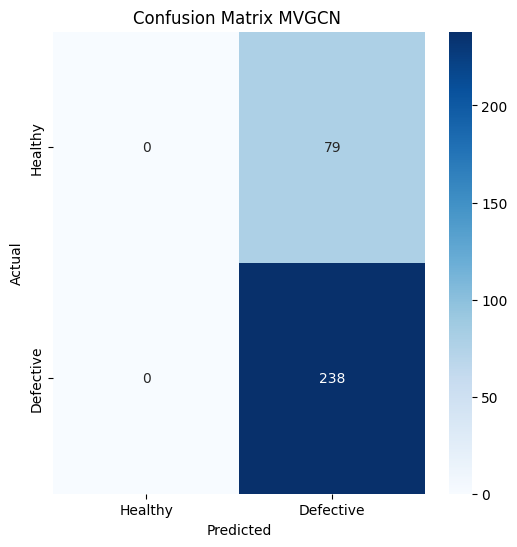

In [40]:
import os, glob, numpy as np, pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import torch, torch.nn as nn, torch.nn.functional as F
from torch_geometric.data import Data, DataLoader, InMemoryDataset
from torch_geometric.nn import GCNConv
from torch_geometric.utils import to_undirected
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from torch_scatter import scatter_add
    scatter_available = True
except:
    scatter_available = False

# ----------------- تنظیمات -----------------
DATA_DIR = "/content/DATA_PICTURE_3D_Change"
K_NEIGHBORS = 8
THRESH_QUANTILE = 0.9
BATCH_SIZE = 4
EPOCHS = 50
LR = 1e-3
HIDDEN = 64
DROPOUT = 0.3
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ----------------- آماده سازی فایل‌ها و لیبل‌ها -----------------
file_label_pairs = []
for folder in ["picture_health", "picture_void", "picture_alpha", "picture_void_alpha"]:
    path = os.path.join(DATA_DIR, folder, "*.csv")
    for f in glob.glob(path):
        lbl = 0 if folder == "picture_health" else 1
        file_label_pairs.append((f, lbl))

print("Total files:", len(file_label_pairs))
print("Sample:", file_label_pairs[:5])

# ----------------- توابع کمکی -----------------
def compute_sigma_and_normals(points, k=8):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(points)
    distances, indices = nbrs.kneighbors(points)
    N = points.shape[0]
    sigmas, normals = np.zeros(N), np.zeros((N,3))
    for i, neigh_idx in enumerate(indices):
        neigh_pts = points[neigh_idx]
        centroid = neigh_pts.mean(axis=0)
        cov = np.cov((neigh_pts-centroid).T)
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = np.argsort(eigvals)
        eigvals, eigvecs = eigvals[order], eigvecs[:,order]
        lam0,lam1,lam2 = eigvals
        sigmas[i] = lam0 / (lam0+lam1+lam2+1e-12)
        normals[i] = eigvecs[:,0]
    return sigmas, normals, distances, indices

def build_pyg_data(fpath, k=8, q=0.8, scaler=None):
    df = pd.read_csv(fpath)
    points = df[['x','y','z']].values.astype(np.float32)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points,k)
    mean_dists = np.mean(distances[:,1:],axis=1)
    local_density = 1.0/(mean_dists+1e-12)
    delta = np.quantile(sigmas,q)
    mask = (sigmas>=delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)],axis=1).astype(np.float32)
    if scaler is not None:
        feats = scaler.transform(feats)
    edges=[]
    for i in range(points.shape[0]):
        for j in indices[i][1:]:
            edges.append([i,j])
    edge_index=torch.tensor(edges,dtype=torch.long).t().contiguous()
    edge_index=to_undirected(edge_index)
    return Data(x=torch.tensor(feats,dtype=torch.float), edge_index=edge_index, mask=torch.tensor(mask,dtype=torch.long))

# ----------------- دیتاست PyG -----------------
class MyDataset(InMemoryDataset):
    def __init__(self,file_label_pairs,k=8,q=0.8,scaler=None):
        super().__init__('.')
        self.data_list=[]
        for f,lbl in file_label_pairs:
            d=build_pyg_data(f,k,q,scaler)
            d.y = torch.tensor([lbl])
            self.data_list.append(d)
    def get(self,idx): return self.data_list[idx]
    def len(self): return len(self.data_list)

# ----------------- استانداردسازی ویژگی‌ها -----------------
all_feats = []
for f,_ in file_label_pairs:
    df = pd.read_csv(f)
    points = df[['x','y','z']].values.astype(np.float32)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points,K_NEIGHBORS)
    mean_dists = np.mean(distances[:,1:],axis=1)
    local_density = 1.0/(mean_dists+1e-12)
    delta = np.quantile(sigmas,THRESH_QUANTILE)
    mask = (sigmas>=delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)],axis=1).astype(np.float32)
    all_feats.append(feats)
all_feats = np.vstack(all_feats)
scaler = StandardScaler().fit(all_feats)

# ----------------- ساخت دیتاست -----------------
dataset = MyDataset(file_label_pairs,K_NEIGHBORS,THRESH_QUANTILE,scaler)
idx=np.arange(len(dataset))
tr,te=train_test_split(idx,test_size=0.2,random_state=RANDOM_SEED,
                       stratify=[l for _,l in file_label_pairs])
train_list=[dataset.get(i) for i in tr]
test_list=[dataset.get(i) for i in te]
train_loader=DataLoader(train_list,batch_size=BATCH_SIZE,shuffle=True)
test_loader=DataLoader(test_list,batch_size=BATCH_SIZE)

# ----------------- مدل MVGCN -----------------
class MVGCN(nn.Module):
    def __init__(self,in_channels,hidden,num_classes=2,dropout=0.3):
        super().__init__()
        self.conv1_local=GCNConv(in_channels,hidden)
        self.conv2_local=GCNConv(hidden,hidden)
        self.conv1_global=GCNConv(in_channels,hidden)
        self.conv2_global=GCNConv(hidden,hidden)
        self.fc1=nn.Linear(2*hidden,hidden)
        self.fc2=nn.Linear(hidden,num_classes)
        self.dropout = nn.Dropout(dropout)

    def masked_mean(self,x,mask,batch):
        maskf=mask.view(-1,1).float()
        xm=x*maskf
        if scatter_available:
            sum_mask=scatter_add(xm,batch,dim=0)
            counts=scatter_add(maskf,batch,dim=0)
            return sum_mask/(counts+1e-12)
        else:
            out=torch.zeros(batch.max()+1,x.size(1),device=x.device)
            cnt=torch.zeros(batch.max()+1,1,device=x.device)
            for i in range(x.size(0)):
                b=batch[i].item()
                if mask[i]==1:
                    out[b]+=x[i]; cnt[b]+=1
            return out/(cnt+1e-12)

    def forward(self,data):
        x,ei,b,mask=data.x,data.edge_index,data.batch,data.mask
        h_l=F.relu(self.conv1_local(x,ei))
        h_l=F.relu(self.conv2_local(h_l,ei))
        local_p=self.masked_mean(h_l,mask,b)
        inv_mask=(1-mask).long()
        h_g=F.relu(self.conv1_global(x,ei))
        h_g=F.relu(self.conv2_global(h_g,ei))
        global_p=self.masked_mean(h_g,inv_mask,b)
        fused=torch.cat([local_p,global_p],dim=1)
        out=F.relu(self.fc1(fused))
        out = self.dropout(out)
        return self.fc2(out)

# ----------------- Weighted Loss -----------------
labels_list = [v for _,v in file_label_pairs]
class_weights = compute_class_weight('balanced', classes=np.unique(labels_list), y=labels_list)
class_weights = torch.tensor(class_weights, dtype=torch.float).to('cuda' if torch.cuda.is_available() else 'cpu')

# ----------------- آموزش و ارزیابی -----------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MVGCN(8,HIDDEN,2,DROPOUT).to(device)
opt = torch.optim.Adam(model.parameters(),lr=LR)

def train_epoch(model,loader,opt,device,class_weights):
    model.train()
    total_loss=0; preds=[]; labels_=[]
    for d in loader:
        d=d.to(device)
        opt.zero_grad()
        out=model(d)
        loss=F.cross_entropy(out,d.y,weight=class_weights)
        loss.backward()
        opt.step()
        total_loss += loss.item()
        preds.extend(out.argmax(1).cpu().numpy())
        labels_.extend(d.y.cpu().numpy())
    return total_loss/len(loader), accuracy_score(labels_,preds)

@torch.no_grad()
def eval_epoch(model,loader,device):
    model.eval()
    preds=[]; labels_=[]
    for d in loader:
        d=d.to(device)
        out=model(d)
        preds.extend(out.argmax(1).cpu().numpy())
        labels_.extend(d.y.cpu().numpy())
    return accuracy_score(labels_,preds), classification_report(labels_,preds,digits=4), preds, labels_

def plot_confusion_matrix(y_true, y_pred, class_names=None, figsize=(6,6), cmap="Blues"):
    cm = confusion_matrix(y_true, y_pred)
    if class_names is None:
        class_names = [str(i) for i in range(len(cm))]
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix MVGCN ")
    plt.show()

# ----------------- حلقه آموزش -----------------
for epoch in range(1, EPOCHS+1):
    loss, acc = train_epoch(model, train_loader, opt, device, class_weights)
    print(f"Epoch {epoch:03d} | Loss {loss:.4f} | Train Acc {acc:.4f}")

# ----------------- ارزیابی -----------------
acc, report, preds, labels_ = eval_epoch(model, test_loader, device)
print("\n=== Test Result ===")
print("Accuracy:", acc)
print(report)

# ----------------- رسم ماتریس اغتشاش -----------------
plot_confusion_matrix(labels_, preds, class_names=["Healthy", "Defective"])


In [ ]:
import os, glob, numpy as np, pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import torch, torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader, InMemoryDataset
from torch_geometric.nn import GCNConv
from torch_geometric.utils import to_undirected

try:
    from torch_scatter import scatter_add
    scatter_available = True
except:
    scatter_available = False

# ----------------- تنظیمات -----------------
DATA_DIR = "/content/DATA_PICTURE_3D_Change"
K_NEIGHBORS = 8
THRESH_QUANTILE = 0.8
BATCH_SIZE = 4
EPOCHS = 50
LR = 1e-3
HIDDEN = 64
DROPOUT = 0.3
MLP_HIDDEN = 64
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ----------------- آماده سازی فایل‌ها و لیبل‌ها -----------------
file_label_pairs = []
for folder in ["picture_health", "picture_void", "picture_alpha", "picture_void_alpha"]:
    path = os.path.join(DATA_DIR, folder, "*.csv")
    for f in glob.glob(path):
        lbl = 0 if folder == "picture_health" else 1
        file_label_pairs.append((f, lbl))

print("Total files:", len(file_label_pairs))
print("Sample:", file_label_pairs[:5])

# ----------------- توابع کمکی -----------------
def compute_sigma_and_normals(points, k=8):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(points)
    distances, indices = nbrs.kneighbors(points)
    N = points.shape[0]
    sigmas, normals = np.zeros(N), np.zeros((N,3))
    for i, neigh_idx in enumerate(indices):
        neigh_pts = points[neigh_idx]
        centroid = neigh_pts.mean(axis=0)
        cov = np.cov((neigh_pts - centroid).T)
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = np.argsort(eigvals)
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        lam0, lam1, lam2 = eigvals
        sigmas[i] = lam0 / (lam0 + lam1 + lam2 + 1e-12)
        normals[i] = eigvecs[:, 0]
    return sigmas, normals, distances, indices

def build_pyg_data(fpath, k=8, q=0.8, scaler=None):
    df = pd.read_csv(fpath)
    points = df[['x','y','z']].values.astype(np.float32)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points, k)
    mean_dists = np.mean(distances[:,1:], axis=1)
    local_density = 1.0/(mean_dists + 1e-12)
    delta = np.quantile(sigmas, q)
    mask = (sigmas >= delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)], axis=1).astype(np.float32)
    if scaler is not None:
        feats = scaler.transform(feats)
    edges = []
    for i in range(points.shape[0]):
        for j in indices[i][1:]:
            edges.append([i,j])
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    edge_index = to_undirected(edge_index)
    return Data(x=torch.tensor(feats, dtype=torch.float),
                edge_index=edge_index,
                mask=torch.tensor(mask, dtype=torch.long),
                points=torch.tensor(points, dtype=torch.float))

# ----------------- دیتاست PyG -----------------
class MyDataset(InMemoryDataset):
    def __init__(self, file_label_pairs, k=8, q=0.8, scaler=None):
        super().__init__('.')
        self.data_list = []
        for f, lbl in file_label_pairs:
            d = build_pyg_data(f, k, q, scaler)
            d.y = torch.tensor([lbl])
            self.data_list.append(d)
    def get(self, idx): return self.data_list[idx]
    def len(self): return len(self.data_list)

# ----------------- استانداردسازی ویژگی‌ها -----------------
all_feats = []
for f,_ in file_label_pairs:
    df = pd.read_csv(f)
    points = df[['x','y','z']].values.astype(np.float32)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points, K_NEIGHBORS)
    mean_dists = np.mean(distances[:,1:], axis=1)
    local_density = 1.0/(mean_dists + 1e-12)
    delta = np.quantile(sigmas, THRESH_QUANTILE)
    mask = (sigmas >= delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)], axis=1).astype(np.float32)
    all_feats.append(feats)
all_feats = np.vstack(all_feats)
scaler = StandardScaler().fit(all_feats)

# ----------------- ساخت دیتاست -----------------
dataset = MyDataset(file_label_pairs, K_NEIGHBORS, THRESH_QUANTILE, scaler)
idx = np.arange(len(dataset))
tr, te = train_test_split(idx, test_size=0.2, random_state=RANDOM_SEED,
                          stratify=[l for _, l in file_label_pairs])
train_list = [dataset.get(i) for i in tr]
test_list = [dataset.get(i) for i in te]
train_loader = DataLoader(train_list, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_list, batch_size=BATCH_SIZE)

# ----------------- مدل MVGCN -----------------
class MVGCN(nn.Module):
    def __init__(self, in_channels, hidden, num_classes=2, dropout=0.3):
        super().__init__()
        self.conv1_local = GCNConv(in_channels, hidden)
        self.conv2_local = GCNConv(hidden, hidden)
        self.conv1_global = GCNConv(in_channels, hidden)
        self.conv2_global = GCNConv(hidden, hidden)
        self.fc1 = nn.Linear(2*hidden, hidden)
        self.fc2 = nn.Linear(hidden, num_classes)
        self.dropout = nn.Dropout(dropout)

    def masked_mean(self, x, mask, batch):
        maskf = mask.view(-1,1).float()
        xm = x * maskf
        if scatter_available:
            sum_mask = scatter_add(xm, batch, dim=0)
            counts = scatter_add(maskf, batch, dim=0)
            return sum_mask / (counts + 1e-12)
        else:
            out = torch.zeros(batch.max()+1, x.size(1), device=x.device)
            cnt = torch.zeros(batch.max()+1, 1, device=x.device)
            for i in range(x.size(0)):
                b = batch[i].item()
                if mask[i] == 1:
                    out[b] += x[i]; cnt[b] += 1
            return out / (cnt + 1e-12)

    def forward(self, data):
        x, ei, b, mask = data.x, data.edge_index, data.batch, data.mask
        h_l = F.relu(self.conv1_local(x, ei))
        h_l = F.relu(self.conv2_local(h_l, ei))
        local_p = self.masked_mean(h_l, mask, b)
        inv_mask = (1-mask).long()
        h_g = F.relu(self.conv1_global(x, ei))
        h_g = F.relu(self.conv2_global(h_g, ei))
        global_p = self.masked_mean(h_g, inv_mask, b)
        fused = torch.cat([local_p, global_p], dim=1)
        out = F.relu(self.fc1(fused))
        out = self.dropout(out)
        return self.fc2(out), fused  # return fused embedding too

# ----------------- Quadratic Fit -----------------
def quadratic_fit(points):
    X = points[:,0].numpy()
    Y = points[:,1].numpy()
    Z = points[:,2].numpy()
    A = np.column_stack([X**2, Y**2, X*Y, X, Y, np.ones_like(X)])
    coef, _, _, _ = np.linalg.lstsq(A, Z, rcond=None)
    return coef  # a,b,c,d,e,f

# ----------------- MLP Classifier -----------------
class Classifier(nn.Module):
    def __init__(self, input_dim, hidden=MLP_HIDDEN, num_classes=2):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden)
        self.fc2 = nn.Linear(hidden, num_classes)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# ----------------- آموزش MVGCN و گرفتن embedding و ترکیب -----------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mvgcn = MVGCN(8, HIDDEN, 2, DROPOUT).to(device)
opt_mvgcn = torch.optim.Adam(mvgcn.parameters(), lr=LR)

# Weighted loss
labels_list = [v for _,v in file_label_pairs]
class_weights = compute_class_weight('balanced', classes=np.unique(labels_list), y=labels_list)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

for epoch in range(10):  # کوتاه برای تست اولیه
    mvgcn.train()
    total_loss = 0
    for d in train_loader:
        d = d.to(device)
        opt_mvgcn.zero_grad()
        out, _ = mvgcn(d)
        loss = F.cross_entropy(out, d.y, weight=class_weights)
        loss.backward()
        opt_mvgcn.step()
        total_loss += loss.item()
    print(f"MVGCN Epoch {epoch+1} | Loss {total_loss/len(train_loader):.4f}")

# ----------------- گرفتن embedding و ترکیب با ضرایب -----------------
def build_combined_features(loader, model, device):
    model.eval()
    features, labels_ = [], []
    with torch.no_grad():
        for d in loader:
            d = d.to(device)
            out, embedding = model(d)
            for i in range(len(d.y)):
                emb = embedding[i].cpu().numpy()
                coefs = quadratic_fit(d.points[i])
                combined = np.concatenate([emb, coefs])
                features.append(combined)
                labels_.append(d.y[i].item())
    return np.array(features), np.array(labels_)

X_train, y_train = build_combined_features(train_loader, mvgcn, device)
X_test, y_test = build_combined_features(test_loader, mvgcn, device)

# ----------------- آموزش MLP دسته بندی -----------------
mlp_input_dim = X_train.shape[1]
classifier = Classifier(mlp_input_dim).to(device)
opt_mlp = torch.optim.Adam(classifier.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss(weight=class_weights)

for epoch in range(50):
    classifier.train()
    opt_mlp.zero_grad()
    inputs = torch.tensor(X_train, dtype=torch.float32).to(device)
    targets = torch.tensor(y_train, dtype=torch.long).to(device)
    outputs = classifier(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    opt_mlp.step()
    pred = outputs.argmax(1).cpu().numpy()
    acc = accuracy_score(y_train, pred)
    print(f"MLP Epoch {epoch+1} | Loss {loss.item():.4f} | Acc {acc:.4f}")

# ----------------- ارزیابی -----------------
classifier.eval()
with torch.no_grad():
    inputs = torch.tensor(X_test, dtype=torch.float32).to(device)
    targets = torch.tensor(y_test, dtype=torch.long).to(device)
    outputs = classifier(inputs)
    pred = outputs.argmax(1).cpu().numpy()
acc = accuracy_score(y_test, pred)
report = classification_report(y_test, pred, digits=4)
print("\n=== Test Result ===")
print("Accuracy:", acc)
print(report)


Total files: 1584
Sample: [('/content/DATA_PICTURE_3D_Change/picture_health/h_0.037_void_0.2.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.031_void_0.1.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.034_void_0.3.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.027_void_0.1.csv', 0), ('/content/DATA_PICTURE_3D_Change/picture_health/h_0.04_void_0.2.csv', 0)]


/usr/local/lib/python3.12/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


MVGCN Epoch 1 | Loss 0.6847
MVGCN Epoch 2 | Loss 0.6771
MVGCN Epoch 3 | Loss 0.6770
MVGCN Epoch 4 | Loss 0.6801
MVGCN Epoch 5 | Loss 0.6800
MVGCN Epoch 6 | Loss 0.6814
MVGCN Epoch 7 | Loss 0.6781
MVGCN Epoch 8 | Loss 0.6744
MVGCN Epoch 9 | Loss 0.6821


In [42]:
print(report)

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        79
           1     0.7508    1.0000    0.8577       238

    accuracy                         0.7508       317
   macro avg     0.3754    0.5000    0.4288       317
weighted avg     0.5637    0.7508    0.6439       317



In [1]:
import os, glob, numpy as np, pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import torch
from torch_geometric.data import Data, DataLoader, InMemoryDataset
from torch_geometric.nn import GCNConv
from torch_geometric.utils import to_undirected

try:
    from torch_scatter import scatter_add
    scatter_available = True
except:
    scatter_available = False

# ----------------- تنظیمات -----------------
DATA_DIR = "/content/DATA_PICTURE_3D_Change"
K_NEIGHBORS = 8
THRESH_QUANTILE = 0.8
BATCH_SIZE = 4
HIDDEN = 64
DROPOUT = 0.3
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ----------------- آماده سازی فایل‌ها و لیبل‌ها -----------------
file_label_pairs = []
for folder in ["picture_health", "picture_void", "picture_alpha", "picture_void_alpha"]:
    path = os.path.join(DATA_DIR, folder, "*.csv")
    for f in glob.glob(path):
        lbl = 0 if folder == "picture_health" else 1
        file_label_pairs.append((f, lbl))

# ----------------- توابع کمکی -----------------
def compute_sigma_and_normals(points, k=8):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(points)
    distances, indices = nbrs.kneighbors(points)
    N = points.shape[0]
    sigmas, normals = np.zeros(N), np.zeros((N,3))
    for i, neigh_idx in enumerate(indices):
        neigh_pts = points[neigh_idx]
        centroid = neigh_pts.mean(axis=0)
        cov = np.cov((neigh_pts-centroid).T)
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = np.argsort(eigvals)
        eigvals, eigvecs = eigvals[order], eigvecs[:,order]
        lam0,lam1,lam2 = eigvals
        sigmas[i] = lam0 / (lam0+lam1+lam2+1e-12)
        normals[i] = eigvecs[:,0]
    return sigmas, normals, distances, indices

def build_pyg_data(fpath, k=8, q=0.8, scaler=None):
    df = pd.read_csv(fpath)
    points = df[['x','y','z']].values.astype(np.float32)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points,k)
    mean_dists = np.mean(distances[:,1:],axis=1)
    local_density = 1.0/(mean_dists+1e-12)
    delta = np.quantile(sigmas,q)
    mask = (sigmas>=delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)],axis=1).astype(np.float32)
    if scaler is not None:
        feats = scaler.transform(feats)
    edges=[]
    for i in range(points.shape[0]):
        for j in indices[i][1:]:
            edges.append([i,j])
    edge_index=torch.tensor(edges,dtype=torch.long).t().contiguous()
    edge_index=to_undirected(edge_index)
    return Data(x=torch.tensor(feats,dtype=torch.float),
                edge_index=edge_index,
                mask=torch.tensor(mask,dtype=torch.long),
                points=torch.tensor(points,dtype=torch.float))

# ----------------- دیتاست -----------------
class MyDataset(InMemoryDataset):
    def __init__(self,file_label_pairs,k=8,q=0.8,scaler=None):
        super().__init__('.')
        self.data_list=[]
        for f,lbl in file_label_pairs:
            d=build_pyg_data(f,k,q,scaler)
            d.y = torch.tensor([lbl])
            self.data_list.append(d)
    def get(self,idx): return self.data_list[idx]
    def len(self): return len(self.data_list)

# ----------------- استانداردسازی ویژگی‌ها -----------------
all_feats = []
for f,_ in file_label_pairs:
    df = pd.read_csv(f)
    points = df[['x','y','z']].values.astype(np.float32)
    sigmas, normals, distances, indices = compute_sigma_and_normals(points,K_NEIGHBORS)
    mean_dists = np.mean(distances[:,1:],axis=1)
    local_density = 1.0/(mean_dists+1e-12)
    delta = np.quantile(sigmas,THRESH_QUANTILE)
    mask = (sigmas>=delta).astype(np.int64)
    feats = np.concatenate([points,
                            sigmas.reshape(-1,1),
                            normals,
                            local_density.reshape(-1,1)],axis=1).astype(np.float32)
    all_feats.append(feats)
all_feats = np.vstack(all_feats)
scaler = StandardScaler().fit(all_feats)

dataset = MyDataset(file_label_pairs,K_NEIGHBORS,THRESH_QUANTILE,scaler)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

# ----------------- مدل MVGCN -----------------
class MVGCN(torch.nn.Module):
    def __init__(self,in_channels,hidden,dropout=0.3):
        super().__init__()
        self.conv1_local=GCNConv(in_channels,hidden)
        self.conv2_local=GCNConv(hidden,hidden)
        self.conv1_global=GCNConv(in_channels,hidden)
        self.conv2_global=GCNConv(hidden,hidden)
        self.fc1=torch.nn.Linear(2*hidden,hidden)
        self.dropout = torch.nn.Dropout(dropout)
    def masked_mean(self,x,mask,batch):
        maskf=mask.view(-1,1).float()
        xm=x*maskf
        if scatter_available:
            sum_mask=scatter_add(xm,batch,dim=0)
            counts=scatter_add(maskf,batch,dim=0)
            return sum_mask/(counts+1e-12)
        else:
            out=torch.zeros(batch.max()+1,x.size(1),device=x.device)
            cnt=torch.zeros(batch.max()+1,1,device=x.device)
            for i in range(x.size(0)):
                b=batch[i].item()
                if mask[i]==1:
                    out[b]+=x[i]; cnt[b]+=1
            return out/(cnt+1e-12)
    def forward(self,data):
        x,ei,b,mask=data.x,data.edge_index,data.batch,data.mask
        h_l=F.relu(self.conv1_local(x,ei))
        h_l=F.relu(self.conv2_local(h_l,ei))
        local_p=self.masked_mean(h_l,mask,b)
        inv_mask=(1-mask).long()
        h_g=F.relu(self.conv1_global(x,ei))
        h_g=F.relu(self.conv2_global(h_g,ei))
        global_p=self.masked_mean(h_g,inv_mask,b)
        fused=torch.cat([local_p,global_p],dim=1)
        fused = F.relu(self.fc1(fused))
        fused = self.dropout(fused)
        return fused  # فقط embedding برگردان

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MVGCN(dataset[0].x.shape[1], HIDDEN, DROPOUT).to(device)

# ----------------- محاسبه embedding و ضرایب quadratic -----------------
total_coefs = []
def quadratic_fit(points):
    # برازش Z = a*X^2 + b*Y^2 + c*X*Y + d*X + e*Y + f
    df = pd.DataFrame()
    df['X_'] = points[:, 0]
    df['Y_'] = points[:, 1]
    df['Z_'] = points[:, 2]

    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(df[['X_', 'Y_']])


    scaler = StandardScaler()
    df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
    df_stander['Z_'] = df_health['Z_']
    x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
    model = LinearRegression()
    model.fit(x_train, z_train)
    z_predict = model.predict(x_test)
    intercept_0 = model.intercept_
    coef1 = model.coef_[0]
    coef2 = model.coef_[1]
    coef3 = model.coef_[2]
    coef4 = model.coef_[3]
    coef5 = model.coef_[4]
    coef6 = model.coef_[5]


    coefs = [intercept_0 ,coef1 , coef2 , coef3 ,coef4 ,  coef5 , coef6 ]
    return coef



from torch_geometric.data import Batch

model.eval()
all_combined_features = []

for g in dataset.data_list:  # تک تک گراف‌ها
    batch = Batch.from_data_list([g]).to(device)  # تبدیل به batch_size=1
    with torch.no_grad():
        embedding = model(batch)  # embedding
    pts = g.points.cpu().numpy()  # نقاط اصلی
    coef = quadratic_fit(pts)     # ضرایب رگرسیون درجه 2
    combined = np.concatenate([embedding[0].cpu().numpy(), coef])
    total_coefs.append(coef)
    all_combined_features.append(combined)

all_combined_features = np.array(all_combined_features)
print("Shape of combined features:", all_combined_features.shape)
print("First sample vector:", all_combined_features[0])

ModuleNotFoundError: No module named 'torch_geometric'

In [46]:
all_combined_features[0].shape

(70,)

In [49]:
total_coefs[0]

array([ 7.1848888e-05, -1.8083892e-03,  2.3678994e-04, -5.8678309e-03,
       -5.2425999e-02, -1.6679251e-01], dtype=float32)

In [54]:
total_alpha = total_coefs[:300]
total_alpha = np.array(total_alpha)


In [55]:
total_alpha.shape

(300, 6)

/tmp/ipython-input-4242207666.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


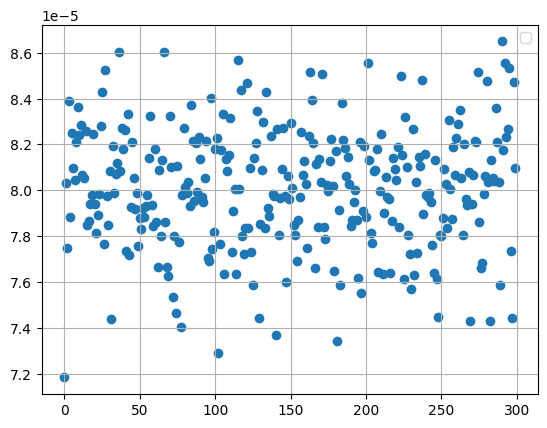

In [56]:
plt.scatter(range(300) , total_alpha[:300 , 0 ] )
plt.legend()
plt.grid()
plt.show()